In [178]:
# Importing required libraries

import numpy as np
import keras
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.utils import np_utils

from sklearn.model_selection import train_test_split

In [179]:
# Opening dataset

data_path = 'C:/Users/Sohan/Desktop/Verzeo/Mask-Detection-using-CNN-master/dataset'
folders = os.listdir(data_path)
files = [i for i in range(len(folders))]
folders_dict = dict(zip(folders,files))

In [180]:
# Reading the data

data = []
target = []

for folder in folders:
    folder_path = os.path.join(data_path,folder)
    images = os.listdir(folder_path)

    for image in images:
        image_path = os.path.join(folder_path,image)
        img = cv2.imread(image_path)
        grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(grayscale,(100,100))
        data.append(resized)
        target.append(folders_dict[folder])


In [181]:
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],100,100,1))
target = np.array(target)

new_target = np_utils.to_categorical(target)

np.save('data',data)
np.save('target',new_target)

In [182]:
# Building model

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = data.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [183]:
# Compiling model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [184]:
# Splitting data into test and train and fitting the model

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2, shuffle = True)
history = model.fit(train_data, train_target, validation_data = (test_data, test_target), epochs = 15, batch_size = 50)

Epoch 1/15
22/22 [==============================] - 10s 445ms/step - loss: 0.6925 - accuracy: 0.5455 - val_loss: 0.6243 - val_accuracy: 0.6232
Epoch 2/15
22/22 [==============================] - 9s 418ms/step - loss: 0.5697 - accuracy: 0.6873 - val_loss: 0.4256 - val_accuracy: 0.7971
Epoch 3/15
22/22 [==============================] - 9s 414ms/step - loss: 0.3435 - accuracy: 0.8636 - val_loss: 0.2398 - val_accuracy: 0.8841
Epoch 4/15
22/22 [==============================] - 10s 456ms/step - loss: 0.2537 - accuracy: 0.8973 - val_loss: 0.2257 - val_accuracy: 0.9094
Epoch 5/15
22/22 [==============================] - 10s 450ms/step - loss: 0.1669 - accuracy: 0.9282 - val_loss: 0.1375 - val_accuracy: 0.9457
Epoch 6/15
22/22 [==============================] - 10s 461ms/step - loss: 0.0900 - accuracy: 0.9682 - val_loss: 0.1125 - val_accuracy: 0.9601
Epoch 7/15
22/22 [==============================] - 10s 442ms/step - loss: 0.0628 - accuracy: 0.9736 - val_loss: 0.1304 - val_accuracy: 0.9601
E

In [185]:
# Using built model to predict 

pred_data = test_data[:10]
pred = model.predict_classes(pred_data)
print(pred)
print(folders_dict)

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
{'with mask': 0, 'without mask': 1}


AxesImage(54,36;334.8x217.44)


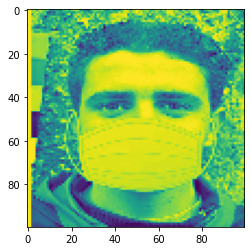

In [186]:
print(plt.imshow(test_data[0].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


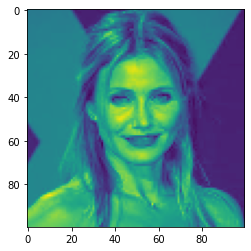

In [187]:
print(plt.imshow(test_data[1].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


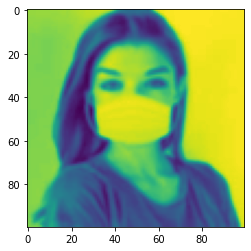

In [188]:
print(plt.imshow(test_data[2].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


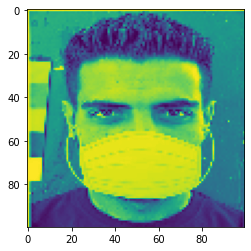

In [189]:
print(plt.imshow(test_data[3].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


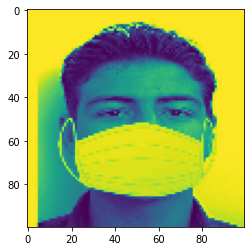

In [190]:
print(plt.imshow(test_data[4].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


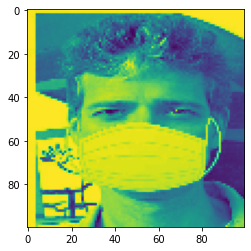

In [191]:
print(plt.imshow(test_data[5].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


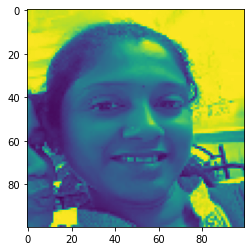

In [192]:
print(plt.imshow(test_data[6].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


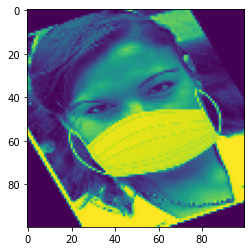

In [193]:
print(plt.imshow(test_data[7].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


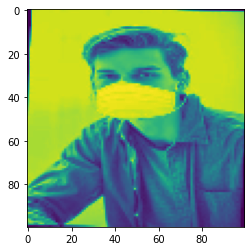

In [194]:
print(plt.imshow(test_data[8].reshape(100,100)))

AxesImage(54,36;334.8x217.44)


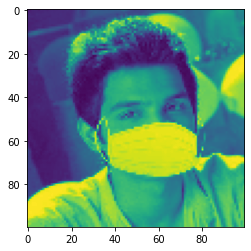

In [195]:
print(plt.imshow(test_data[9].reshape(100,100)))

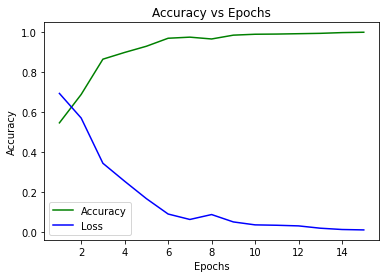

In [196]:
loss_train = history.history['accuracy']
loss_val = history.history['loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='Loss')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()